In [1]:
import pickle
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
from parameter_estimator import ParameterEstimator
from mpl_toolkits.mplot3d import axes3d
import utils
from itertools import combinations
import pandas as pd
import random
import time
from scipy.optimize import least_squares

In [2]:
mode='dome'
if(mode=='full_sphere'):
    r=2
    lin_phi = np.linspace(0, 2*np.pi, 18) # causes last markers overlap first ones 
    lin_theta = np.linspace(-0.45*np.pi, 0.45*np.pi, 10) # if we go up to pi/2 markers will overlap at poles
elif (mode=='dome'):
    r=2
    lin_phi = np.linspace(0, 2*np.pi, 8)
    lin_theta = np.linspace(15/180*np.pi, 0.5*np.pi-20/180*np.pi, 3)
else:
    raise BaseException("none of the options chosen")
    
lin_phi = lin_phi[:-1] #disgard last element as it is overlaid over other marker

_theta, _phi = np.meshgrid(lin_theta, lin_phi)
x = (r*np.cos(_theta)*np.cos(_phi)).flatten()
y = (r*np.cos(_theta)*np.sin(_phi)).flatten()
z = (r*np.sin(_theta)).flatten()
theta=_theta.flatten()
phi=_phi.flatten()

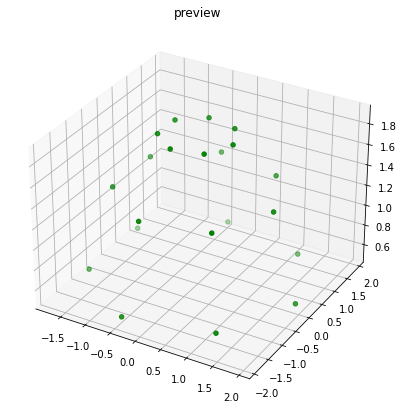

In [3]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("preview")
 
# show plot
plt.show()

In [4]:
observations_file_str = 'observations_fake2.p'
# observations_file_str = 'obs_2007_gazebo_iiwa_stopping.bag_20230720-135812.p'
# observations_file_str = 'obs_2007_gazebo_.p'

observations_file = open(observations_file_str, 'rb')
# dump information to that file
observations = pickle.load(observations_file)
# close the file
observations_file.close()

In [31]:
T_corr = np.eye(4)

T_corr = np.array([[ 0,  0, 1, 0],
                   [-1,  0, 0, 0],
                   [ 0, -1, 0, 0],
                   [ 0,  0, 0, 1]]) # euler [ x: -np.pi/2, y: np.pi/2, z: 0 ]
T_corr = utils.Ry(np.pi/2)@utils.Rz(-np.pi/2)
print(utils.roundprint(T_corr))

T_W0 = np.array([[-1, 0, 0, 0],
                 [0, -1, 0, 0],
                 [0, 0, 1, 0.36],
                 [0, 0, 0, 1]])

 0.000  0.000  1.000  0.000 

-1.000  0.000  0.000  0.000 

 0.000 -1.000  0.000  0.000 

 0.000  0.000  0.000  1.000 



None


In [32]:
theta_nom = ParameterEstimator.dhparams["theta_nom"].astype(float)
r_nom = ParameterEstimator.dhparams["r_nom"].astype(float)
d_nom = ParameterEstimator.dhparams["d_nom"].astype(float)
alpha_nom = ParameterEstimator.dhparams["alpha_nom"].astype(float)
x_m, y_m, z_m = [], [], []
for markerid in list(observations)[:]:
    for obs in observations[markerid]:
        q = np.hstack((np.array(obs['q']), np.zeros(1)))
        T_0C = ParameterEstimator.get_T_jk(0, 8, q, theta_nom, d_nom, r_nom, alpha_nom)
        T_CM = T_corr @ utils.H_rvec_tvec(obs['rvec'], obs['tvec']) @ np.linalg.inv(T_corr)
        T_WM = T_W0 @ T_0C @ T_CM
        x_m.append(T_WM[0, 3])
        y_m.append(T_WM[1, 3])
        z_m.append(T_WM[2, 3])

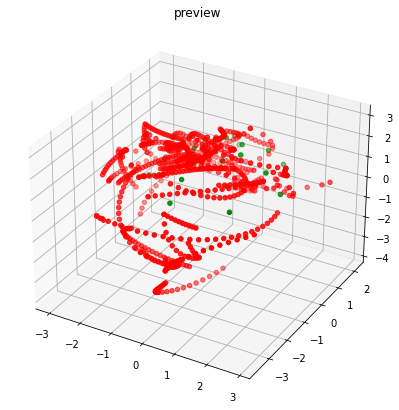

In [33]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
ax.scatter3D(x_m, y_m, z_m, color = "red")
plt.title("preview")
 
# show plot
plt.show()

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
7
